Name: Batyr Kenzheakhmetov

ID: 000801267

Honor code: I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else’s work as my own.

In [ ]:
# We connect to Google Drive to get the necessary files from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Directories
# Base directory containing the dataset
b_dir = '/content/drive/MyDrive/cats_dogs_sm'

# Directories for training, validation, and testing sets
train_dir = b_dir + '/train'
vali_dir = b_dir + '/validation'
test_dir = b_dir + '/test'

# Directories for cats and dogs in the training set
train_cats_dir = b_dir + '/train/cats'
train_dogs_dir = b_dir + '/train/dogs'

# Directories for cats and dogs in the validation set
vali_cats_dir = b_dir + '/validation/cats'
vali_dogs_dir = b_dir + '/validation/dogs'

# Directories for cats and dogs in the test set
test_cats_dir = b_dir + '/test/cats'
test_dogs_dir = b_dir + '/test/dogs'

import os, shutil

# Display the total number of images in each category
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(vali_cats_dir)))
print('total validation dog images:', len(os.listdir(vali_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras import backend as BE
import matplotlib.pyplot as plt
import numpy as np

# Importing necessary function from Keras utilities for loading image datasets from directories
from keras.utils import image_dataset_from_directory

# Creating train dataset from images in train_dir directory with image size of (180, 180) and batch size of 32
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
# Creating validation dataset from images in vali_dir directory with image size of (180, 180) and batch size of 32
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(180, 180),
    batch_size=32)
# Creating test dataset from images in test_dir directory with image size of (180, 180), batch size of 32, and no shuffling
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
    shuffle=False)

# Adding a data augmentation stage and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


# Xception - MODEL

The Xception model is a convolutional neural network (CNN) architecture designed for image classification. It stands out for its reliance on depthwise separable convolutions, making it a lightweight and efficient model compared to others like Inception.

**Architecture:**

Xception builds upon the Inception architecture, a popular CNN design.
Instead of standard Inception modules, it uses depthwise separable convolutions. These break down a convolution into two steps: depthwise (applying individual filters to each channel) and pointwise (combining the outputs using 1x1 convolutions). This reduces computational cost while maintaining similar performance.

**Pre-training:**

Xception models are often pre-trained on the ImageNet dataset, a massive collection of images with labeled categories.
This pre-training equips the model with a strong foundation for recognizing general image features.
Applications:

Xception excels in image classification tasks.
By leveraging its pre-trained weights, you can fine-tune the model for specific classification problems, like identifying objects in images or recognizing different types of animals.

**Benefits of using a pre-trained Xception model:**

Reduced training time: Pre-trained models learn generic features from massive datasets, allowing you to focus on fine-tuning for your specific task, significantly reducing training time.

Improved performance: Pre-trained models often outperform models trained from scratch, especially for small datasets.

Efficiency: Xception's architecture with depthwise separable convolutions makes it a lightweight model, requiring less computational power.

**Getting Started with Xception:**

Libraries like Keras and TensorFlow provide access to pre-trained Xception models.
You can load the model and fine-tune it for your classification task by replacing the final layers with your own set of classes.


In [ ]:
from keras.applications import Xception

conv_base = Xception(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.xception.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

83683744/83683744 [==============================] - 5s 0us/step
Epoch 1/30
63/63 [==============================] - 24s 252ms/step - loss: 7.9652 - accuracy: 0.9180 - val_loss: 28.6695 - val_accuracy: 0.7110
Epoch 2/30
63/63 [==============================] - 13s 199ms/step - loss: 4.8706 - accuracy: 0.9495 - val_loss: 2.4293 - val_accuracy: 0.9660
Epoch 3/30
63/63 [==============================] - 14s 203ms/step - loss: 4.1062 - accuracy: 0.9525 - val_loss: 1.4134 - val_accuracy: 0.9870
Epoch 4/30
63/63 [==============================] - 15s 222ms/step - loss: 3.5294 - accuracy: 0.9615 - val_loss: 2.7350 - val_accuracy: 0.9710
Epoch 5/30
63/63 [==============================] - 13s 193ms/step - loss: 2.6762 - accuracy: 0.9645 - val_loss: 2.5381 - val_accuracy: 0.9700
Epoch 6/30
63/63 [==============================] - 13s 185ms/step - loss: 2.6112 - accuracy: 0.9680 - val_loss: 1.7900 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 13s 195ms/step - loss: 2

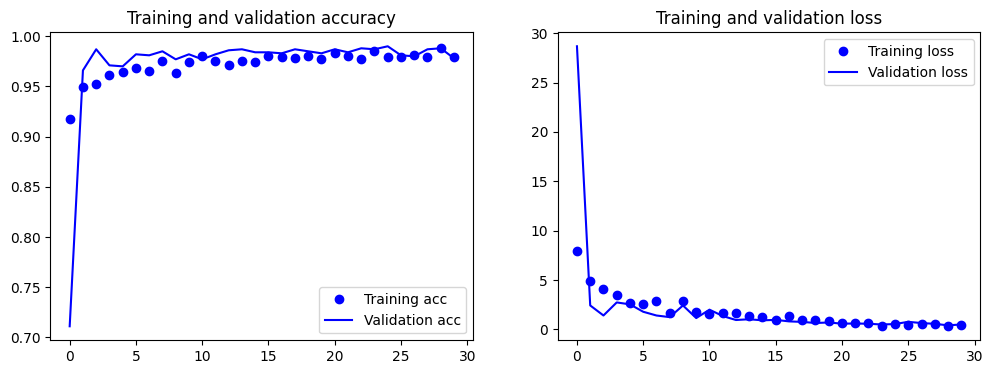

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# VGG16 - MODEL

VGG16: A Deep Convolutional Neural Network for Image Classification
VGG16 is another widely used pre-trained model for image classification tasks. Here's what makes it distinct:

Architecture: Unlike Xception's focus on efficiency, VGG16 prioritizes depth. It has 16 layers, including convolutional and fully-connected layers, allowing it to capture complex image features.

Pre-training: Similar to Xception, VGG16 models are pre-trained on ImageNet, providing a strong foundation for image recognition.

Applications: VGG16 excels at image classification tasks and can be a good choice when computational resources aren't a major constraint.

Key takeaway: Compared to Xception's lightweight design, VGG16 offers potentially higher accuracy but with increased computational cost.

For getting started with VGG16, you can refer to similar resources as Xception, using libraries like Keras or TensorFlow to leverage its pre-trained capabilities for your image classification projects.

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/30
63/63 [==============================] - 25s 279ms/step - loss: 16.0007 - accuracy: 0.9020 - val_loss: 10.0192 - val_accuracy: 0.9400
Epoch 2/30
63/63 [==============================] - 14s 207ms/step - loss: 8.3467 - accuracy: 0.9415 - val_loss: 3.8862 - val_accuracy: 0.9740
Epoch 3/30
63/63 [==============================] - 14s 197ms/step - loss: 6.6262 - accuracy: 0.9510 - val_loss: 14.1004 - val_accuracy: 0.9370
Epoch 4/30
63/63 [==============================] - 13s 192ms/step - loss: 6.1065 - accuracy: 0.9595 - val_loss: 4.0387 - val_accuracy: 0.9730
Epoch 5/30
63/63 [==============================] - 13s 198ms/step - loss: 3.6146 - accuracy: 0.9650 - val_loss: 4.1405 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 13s 197ms/step - loss: 3.6257 - accuracy: 0.9715 - val_loss: 3.5980 - val_accuracy: 0.9740
Epoch 7/30
63/63 [==============================] - 13s 199ms/step - loss:

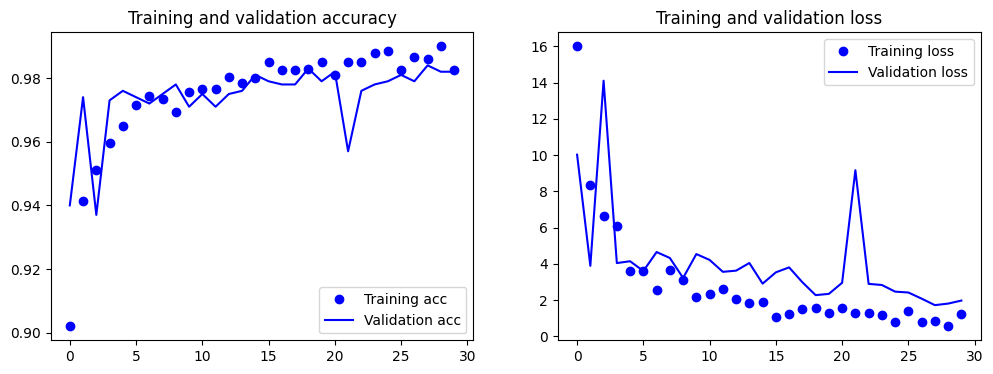

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# VGG19 - MODEL


VGG19, the bigger sibling of VGG16, follows the same core principles but with some key differences:

Depth:  VGG19 boasts 19 layers, going even deeper than VGG16 in its convolutional architecture. This potentially allows it to capture even more intricate features within images.

Trade-off:  While VGG19 might offer slightly better accuracy due to its depth, it comes at the cost of being computationally more expensive compared to VGG16.

Similarities:  Just like VGG16, VGG19 is pre-trained on ImageNet and excels in image classification tasks. Both models are available for use and fine-tuning through deep learning libraries like Keras and TensorFlow.

In essence, choosing between VGG16 and VGG19 depends on your priorities. If you have the computational resources and require the most accurate model possible, VGG19 might be the better option. If efficiency is a concern, VGG16 offers a good balance between performance and resource usage.

In [ ]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg19.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 43s 286ms/step - loss: 15.5997 - accuracy: 0.8980 - val_loss: 3.3741 - val_accuracy: 0.9660
Epoch 2/30
63/63 [==============================] - 14s 206ms/step - loss: 5.0926 - accuracy: 0.9495 - val_loss: 5.0730 - val_accuracy: 0.9610
Epoch 3/30
63/63 [==============================] - 14s 216ms/step - loss: 5.9551 - accuracy: 0.9535 - val_loss: 3.9319 - val_accuracy: 0.9670
Epoch 4/30
63/63 [==============================] - 14s 212ms/step - loss: 5.0706 - accuracy: 0.9560 - val_loss: 4.8530 - val_accuracy: 0.9660
Epoch 5/30
63/63 [==============================] - 14s 216ms/step - loss: 4.9574 - accuracy: 0.9585 - val_loss: 3.2357 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 14s 213ms/step - loss: 2.8602 - accuracy: 0.9740 - val_loss: 2.3141 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 14s 215ms/step - loss: 4.1195 - accuracy: 0.9650 - val_loss: 2.2594 - val_accuracy: 0.979

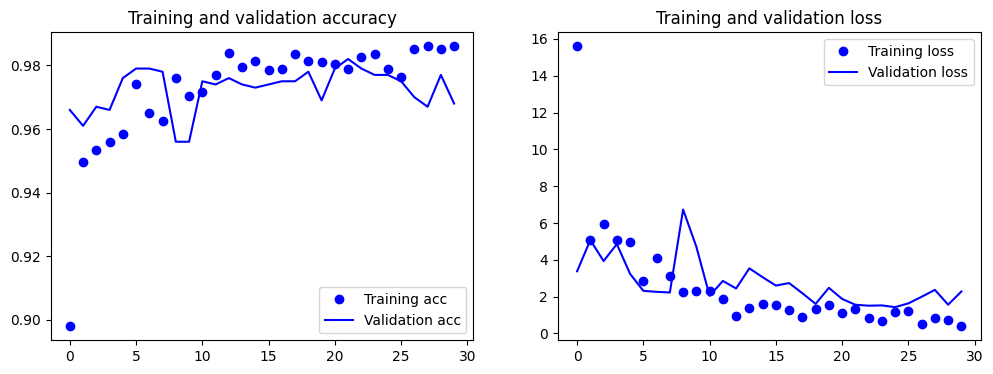

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet50 - MODEL

ResNet50 builds upon the VGG16 and VGG19 architecture by introducing a concept called residual learning. Here's what makes ResNet50 unique:

Residual Learning:  Standard deep neural networks can struggle with vanishing gradients during training, making it difficult to learn complex features in very deep models. ResNet tackles this by introducing residual blocks. These blocks allow the network to learn residual functions that are added to the layer input, rather than trying to learn the entire function from scratch. This approach enables ResNet50 to achieve greater depths (50 layers) compared to VGG models (16 or 19 layers) while improving training efficiency.

Image Classification Powerhouse:  ResNet50, like its predecessors, is pre-trained on ImageNet and excels at image classification tasks. Its deeper architecture with residual learning makes it a powerful tool for various computer vision applications.

Efficiency vs. Accuracy:  While deeper than VGG models, ResNet50 offers a better balance between depth, accuracy, and training efficiency.

In summary, ResNet50 builds on the foundation of deep convolutional neural networks like VGG models, but with its residual learning approach, it can achieve higher accuracy with a more manageable complexity. This makes ResNet50 a popular choice for various image classification tasks.

In [ ]:
from keras.applications import ResNet50

conv_base = ResNet50(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/30
63/63 [==============================] - 23s 245ms/step - loss: 16.4817 - accuracy: 0.9160 - val_loss: 3.5188 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 13s 194ms/step - loss: 6.5607 - accuracy: 0.9585 - val_loss: 5.7264 - val_accuracy: 0.9620
Epoch 3/30
63/63 [==============================] - 13s 188ms/step - loss: 5.2021 - accuracy: 0.9630 - val_loss: 7.0707 - val_accuracy: 0.9690
Epoch 4/30
63/63 [==============================] - 13s 193ms/step - loss: 4.8422 - accuracy: 0.9660 - val_loss: 2.7790 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 15s 214ms/step - loss: 4.2338 - accuracy: 0.9710 - val_loss: 4.1050 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 13s 194ms/step - loss: 4.0376 - accuracy: 0.9730 - val_loss: 2.9133 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 13s 195ms/step - loss: 3

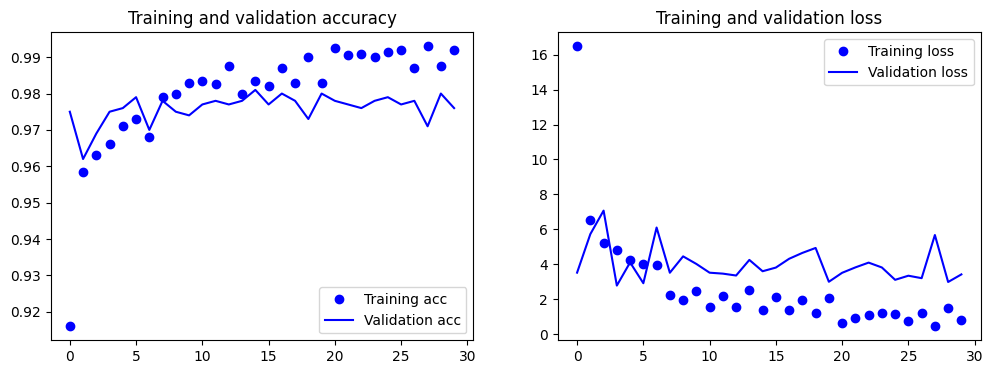

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet50V2 - MODEL

ResNet50V2 is a variation of the well-known ResNet50 model for image classification. Here's a quick rundown of what it offers:

Similar foundation: ResNet50V2 shares the core architecture of ResNet50, including the concept of residual learning with residual blocks. This allows it to achieve good performance in image classification tasks.

Subtle Differences:  While the exact details might vary depending on the implementation, ResNet50V2 may have slight modifications in its convolutional layers or activation functions compared to the original ResNet50. These changes could be aimed at improving efficiency or accuracy in specific scenarios.

Pre-trained Availability: Similar to ResNet50, you can find pre-trained versions of ResNet50V2 models. These models are often trained on ImageNet, providing a strong starting point for fine-tuning on your own image classification tasks.

Key takeaway: If you're familiar with ResNet50, then ResNet50V2 can be considered a close relative with potentially minor improvements or optimizations.

In essence, choosing between ResNet50 and ResNet50V2 depends on whether a specific implementation of ResNet50V2 offers any documented advantages that align with your project's needs.  If you don't have a strong reason to choose V2 specifically, then the standard ResNet50 is a well-established and reliable option.

In [ ]:
from keras.applications import ResNet50V2

conv_base = ResNet50V2(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 894s 14s/step - loss: 10.5183 - accuracy: 0.9180 - val_loss: 2.6157 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 13s 182ms/step - loss: 7.0026 - accuracy: 0.9510 - val_loss: 2.9085 - val_accuracy: 0.9750
Epoch 3/30
63/63 [==============================] - 13s 193ms/step - loss: 5.8276 - accuracy: 0.9610 - val_loss: 3.0506 - val_accuracy: 0.9740
Epoch 4/30
63/63 [==============================] - 13s 194ms/step - loss: 4.9682 - accuracy: 0.9605 - val_loss: 3.5459 - val_accuracy: 0.9680
Epoch 5/30
63/63 [==============================] - 13s 187ms/step - loss: 3.9782 - accuracy: 0.9645 - val_loss: 5.8570 - val_accuracy: 0.9570
Epoch 6/30
63/63 [==============================] - 18s 280ms/step - loss: 3.8919 - accuracy: 0.9620 - val_loss: 5.2400 - val_accuracy: 0.9580
Epoch 7/30
63/63 [==============================] - 12s 185ms/step - loss: 4.2357 - accuracy: 0.9655 - val_loss: 2.7032 - val_accuracy: 0.9740

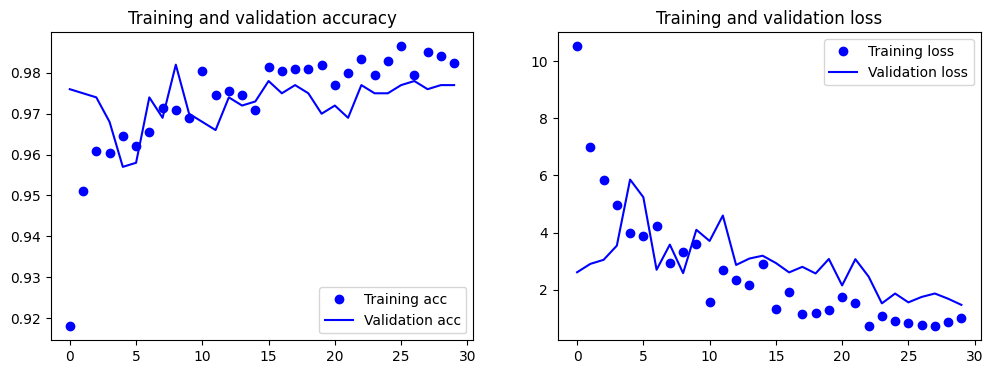

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet101 - MODEL

ResNet101 is the bigger brother of ResNet50, sharing the same core principles but with a significant difference:

Depth Boost:  As the name suggests, ResNet101 boasts 101 layers compared to ResNet50's 50 layers. This increased depth allows ResNet101 to potentially capture even more intricate details and complex relationships within images.

Accuracy Potential:  Due to its deeper architecture, ResNet101 has the potential to achieve higher accuracy in image classification tasks compared to ResNet50. However, this comes at a cost.

Computational Trade-off:  The increased depth of ResNet101 also translates to higher computational demands for training and inference. If resource efficiency is a major concern, ResNet50 might be a better choice.

Pre-trained Versatility:  Similar to ResNet50, you can find pre-trained versions of ResNet101 models. These models are often trained on ImageNet, making them versatile tools for various image classification tasks after fine-tuning.

Choosing between ResNet50 and ResNet101:

The decision depends on your priorities. If you need the absolute best possible accuracy and have the computational resources to handle it, then ResNet101 could be the way to go. However, if efficiency is a concern, or if the difference in accuracy between the two models isn't critical for your application, then ResNet50 might be a more suitable choice.

In [ ]:
from keras.applications import ResNet101

conv_base = ResNet101(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 25s 265ms/step - loss: 10.6463 - accuracy: 0.9255 - val_loss: 3.7340 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 15s 226ms/step - loss: 3.7080 - accuracy: 0.9700 - val_loss: 1.7535 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 15s 224ms/step - loss: 5.2548 - accuracy: 0.9705 - val_loss: 1.8777 - val_accuracy: 0.9870
Epoch 4/30
63/63 [==============================] - 16s 243ms/step - loss: 3.4531 - accuracy: 0.9745 - val_loss: 1.8295 - val_accuracy: 0.9850
Epoch 5/30
63/63 [==============================] - 15s 225ms/step - loss: 3.5334 - accuracy: 0.9765 - val_loss: 2.2852 - val_accuracy: 0.9870
Epoch 6/30
63/63 [==============================] - 16s 238ms/step - loss: 3.9339 - accuracy: 0.9785 - val_loss: 2.1080 - val_accuracy: 0.9850
Epoch 7/30
63/63 [==============================] - 15s 227ms/step - loss: 3.4396 - accuracy: 0.9750 - val_loss: 2.6602 - val_accuracy: 0.982

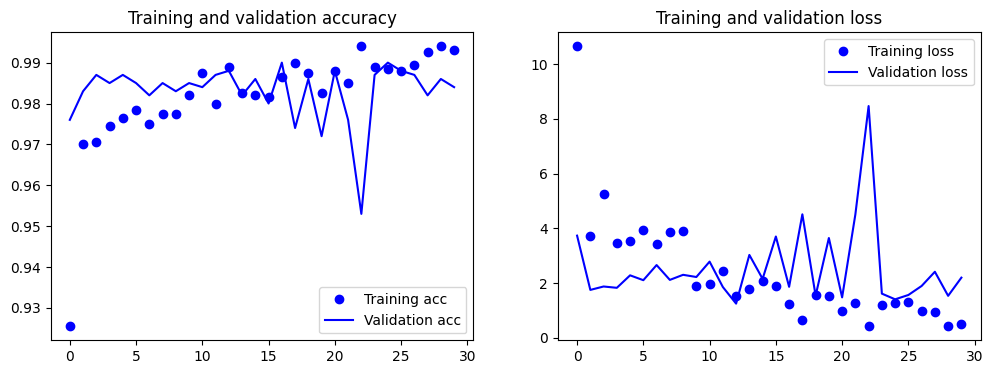

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet101V2 - MODEL

ResNet101V2: Refining the Deep Image Classification Architecture
ResNet101V2 follows in the footsteps of its predecessor, ResNet101, designed for image classification tasks. Here's how it builds upon the foundation:

Core Strengths: Like ResNet101, ResNet101V2 leverages residual learning with residual blocks. This enables it to achieve high accuracy in image classification by overcoming the vanishing gradient problem that can hinder deep networks.

Subtle Architectural Refinements:  While the core functionalities remain similar, ResNet101V2 might have slight variations in its convolutional layers or activation functions compared to the original version. These adjustments could be aimed at improving efficiency, accuracy, or both, depending on the specific implementation.

Pre-trained Availability: Similar to other ResNet models, you can find pre-trained versions of ResNet101V2. These models are often trained on massive datasets like ImageNet, providing a strong foundation for fine-tuning on your specific image classification tasks.

Choosing between ResNet101 and ResNet101V2:

Limited Public Information: Unlike some other variations like ResNet50V2, there might be less publicly available information about the specific changes implemented in ResNet101V2. This can make it challenging to definitively say how much better it performs compared to ResNet101.

Potential Benefits: If the specific implementation of ResNet101V2 offers documented improvements in efficiency or accuracy relevant to your project, it might be a worthwhile option.

Standard ResNet101 as a Strong Baseline: In many cases, the well-established ResNet101 with its pre-trained capabilities might be a reliable choice. If you don't have a compelling reason to switch to V2 based on documented improvements, ResNet101 is a solid option.

In conclusion, while ResNet101V2 represents a potential refinement of the ResNet101 architecture, the specific benefits might depend on the implementation details. If those details aren't readily available, the standard ResNet101 often serves as a strong foundation for image classification tasks.

In [ ]:
from keras.applications import ResNet101V2

conv_base = ResNet101V2(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 23s 237ms/step - loss: 13.1295 - accuracy: 0.9215 - val_loss: 3.6375 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 14s 215ms/step - loss: 5.4605 - accuracy: 0.9600 - val_loss: 3.4872 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 15s 220ms/step - loss: 5.8308 - accuracy: 0.9620 - val_loss: 8.1710 - val_accuracy: 0.9650
Epoch 4/30
63/63 [==============================] - 15s 218ms/step - loss: 4.6456 - accuracy: 0.9685 - val_loss: 6.1906 - val_accuracy: 0.9740
Epoch 5/30
63/63 [==============================] - 16s 237ms/step - loss: 4.9814 - accuracy: 0.9635 - val_loss: 2.9808 - val_accuracy: 0.9830
Epoch 6/30
63/63 [==============================] - 14s 211ms/step - loss: 5.2669 - accuracy: 0.9710 - val_loss: 2.2545 - val_accuracy: 0.9860
Epoch 7/30
63/63 [==============================] - 14s 209ms/step - loss: 4.4312 - accuracy: 0.9710 - val_loss: 2.4352 - val_accuracy: 0.983

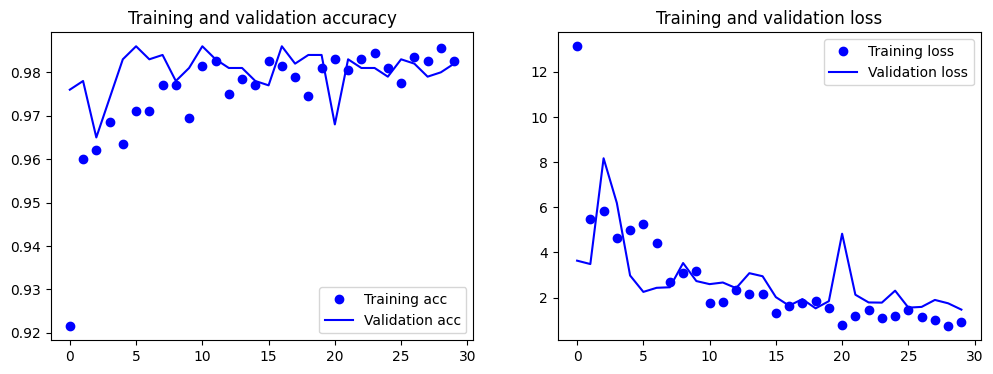

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet152 - MODEL

ResNet152: Pushing the Limits of Image Classification with Depth
ResNet152 takes the core concept of residual learning from ResNet50 to an even greater extreme, aiming for even more powerful image classification:

Deeper Architecture:  As the name suggests, ResNet152 boasts a whopping 152 layers, making it significantly deeper than both ResNet50 (50 layers) and ResNet101 (101 layers). This immense depth allows it to potentially capture even more complex relationships and intricate details within images.

Potential for Highest Accuracy: Due to its exceptional depth, ResNet152 has the potential to achieve the highest accuracy among the commonly used ResNet models for image classification tasks. However, this benefit comes with a significant trade-off.

Computational Demands:  The increased depth of ResNet152 translates to considerably higher computational requirements for both training and inference compared to shallower ResNet models. If your resources are limited, this could be a major bottleneck.

Pre-trained Versatility:  Similar to other ResNet models, pre-trained versions of ResNet152 are available. These are often trained on ImageNet, making them highly versatile for various image classification tasks after fine-tuning on your specific dataset.

Choosing the Right ResNet Model:

The decision heavily relies on your project's priorities:

Absolute Best Accuracy: If achieving the highest possible accuracy is paramount and computational resources aren't a major constraint, then ResNet152 might be the best option.

Balance Between Accuracy and Efficiency:  For most use cases, a balance between accuracy and efficiency is crucial. In such scenarios, ResNet50 or ResNet101 might be more suitable choices, offering good accuracy with lower computational demands compared to ResNet152.

Additional Considerations:

Training Time: Training a deeper model like ResNet152 will generally take longer compared to shallower models.

Hardware Requirements: Utilizing a deep model might necessitate GPUs or TPUs for efficient training and inference, depending on your dataset size and desired speed.

In Conclusion:

ResNet152 represents the deepest and potentially most accurate option among the commonly used ResNet models for image classification. However, its immense depth comes at the cost of significantly higher computational demands. Carefully consider your project's resource constraints and accuracy requirements before choosing ResNet152. In many cases, ResNet50 or ResNet101 might offer a good balance between accuracy and efficiency.

In [ ]:
from keras.applications import ResNet152

conv_base = ResNet152(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 49s 443ms/step - loss: 17.2678 - accuracy: 0.9240 - val_loss: 3.7436 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 19s 288ms/step - loss: 5.6827 - accuracy: 0.9610 - val_loss: 3.0216 - val_accuracy: 0.9800
Epoch 3/30
63/63 [==============================] - 20s 300ms/step - loss: 6.7190 - accuracy: 0.9640 - val_loss: 4.3012 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 19s 297ms/step - loss: 4.5686 - accuracy: 0.9705 - val_loss: 1.9741 - val_accuracy: 0.9870
Epoch 5/30
63/63 [==============================] - 24s 364ms/step - loss: 3.5032 - accuracy: 0.9755 - val_loss: 4.9950 - val_accuracy: 0.9790
Epoch 6/30
63/63 [==============================] - 20s 301ms/step - loss: 3.8353 - accuracy: 0.9735 - val_loss: 1.8777 - val_accuracy: 0.9850
Epoch 7/30
63/63 [==============================] - 20s 312ms/step - loss: 2.9834 - accuracy: 0.9790 - val_loss: 1.3863 - val_accuracy: 0.991

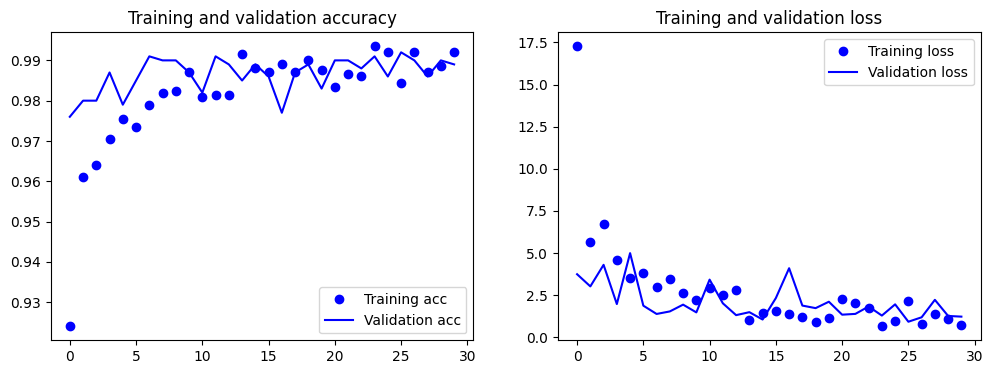

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# ResNet152V2 - MODEL

Following the trend of its shallower counterparts, ResNet152V2 builds upon the foundation of ResNet152 for image classification tasks:

Core Functionality: Similar to ResNet152, ResNet152V2 leverages residual learning with residual blocks. This allows it to achieve high accuracy in image classification by addressing the vanishing gradient problem that can hinder deep networks.

Potential Refinements:  While the core functionalities remain similar, ResNet152V2 might incorporate subtle modifications in its convolutional layers or activation functions compared to the original version. These adjustments could be aimed at improving efficiency, accuracy, or both, depending on the specific implementation.

Pre-trained Availability:  Similar to other ResNet models, you can find pre-trained versions of ResNet152V2. These models are often trained on massive datasets like ImageNet, providing a strong foundation for fine-tuning on your specific image classification tasks.

Limited Public Information on Specific Improvements:

There might be less publicly available information about the specific changes implemented in ResNet152V2 compared to the standard ResNet152. This can make it challenging to definitively say how much better it performs in terms of accuracy or efficiency.

Choosing Between ResNet152 and ResNet152V2:

Potential Benefits: If the specific implementation of ResNet152V2 offers documented improvements in efficiency or accuracy relevant to your project, it might be a worthwhile option, especially if dealing with very large or complex image datasets.

Standard ResNet152 as a Strong Baseline:  In many cases, the well-established ResNet152 with its pre-trained capabilities might be a reliable choice. If you don't have a compelling reason to switch to V2 based on documented improvements, ResNet152 is a solid option, especially if computational resources are a major concern.

Overall:

While ResNet152V2 represents a potential refinement of the ResNet152 architecture, the specific benefits might depend on the implementation details. If those details aren't readily available, the standard ResNet152 often serves as a strong foundation for computationally expensive image classification tasks, particularly when dealing with very large datasets.

In [ ]:
from keras.applications import ResNet152V2

conv_base = ResNet152V2(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

234545216/234545216 [==============================] - 11s 0us/step
Epoch 1/30
63/63 [==============================] - 36s 369ms/step - loss: 10.8963 - accuracy: 0.9310 - val_loss: 2.1145 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 19s 284ms/step - loss: 7.2799 - accuracy: 0.9540 - val_loss: 3.1187 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 19s 283ms/step - loss: 5.1953 - accuracy: 0.9660 - val_loss: 2.8767 - val_accuracy: 0.9860
Epoch 4/30
63/63 [==============================] - 18s 279ms/step - loss: 4.7884 - accuracy: 0.9650 - val_loss: 2.4450 - val_accuracy: 0.9860
Epoch 5/30
63/63 [==============================] - 19s 286ms/step - loss: 5.0628 - accuracy: 0.9700 - val_loss: 3.7179 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 18s 280ms/step - loss: 3.8959 - accuracy: 0.9735 - val_loss: 3.8239 - val_accuracy: 0.9830
Epoch 7/30
63/63 [==============================] - 23s 348ms/step - loss

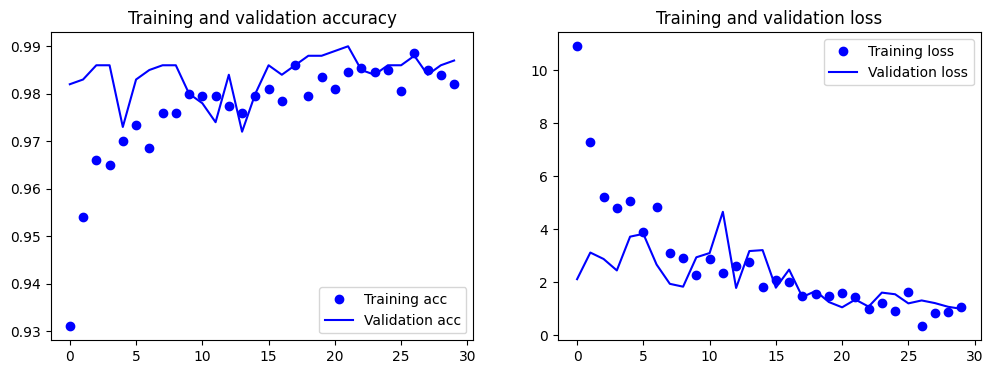

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# InceptionV3 - MODEL


InceptionV3: Achieving High Accuracy in Image Classification
InceptionV3 is a convolutional neural network (CNN) architecture designed for image classification and object detection. It's part of the Inception family of models developed by Google, known for achieving high accuracy on image recognition tasks. Here's a breakdown of InceptionV3's key features:

Inception Modules:  A core element of InceptionV3 is its use of Inception modules. These modules combine convolutional filters of various sizes (1x1, 3x3, 5x5) within a single block. This allows the network to capture different levels of detail and spatial information from an image simultaneously.

Factorized 7x7 Convolutions:  Standard 7x7 convolutions can be computationally expensive. InceptionV3 addresses this by using factorized 7x7 convolutions. These break down the convolution into two steps: first applying 1x7 and 7x1 convolutions sequentially, achieving similar results with less computational power.

Label Smoothing: InceptionV3 incorporates label smoothing during training. This technique adds a small amount of noise to the training labels, making the model less sensitive to overfitting and potentially improving generalization performance.

Auxiliary Classifier: The model also includes an auxiliary classifier, a smaller network trained alongside the main network. This helps propagate gradients and improve the overall training process.

Pre-training: Similar to other pre-trained models, InceptionV3 models are often trained on ImageNet, a massive dataset with labeled categories. This equips the model with a strong foundation for recognizing general image features.

Benefits of Using a Pre-trained InceptionV3 Model:

Reduced Training Time: Leverage the pre-trained weights to focus on fine-tuning for your specific image classification task, significantly reducing training time compared to training from scratch.
Improved Performance: Pre-trained models often outperform models trained from scratch, especially for small datasets.
Efficiency: InceptionV3's architecture with factorized convolutions makes it a relatively efficient model compared to some deeper networks.
Getting Started with InceptionV3:

Deep learning libraries like Keras and TensorFlow provide access to pre-trained InceptionV3 models.
You can load the model and fine-tune it for your classification task by replacing the final layers with your own set of classes.
In essence, InceptionV3 offers a powerful architecture for image classification tasks, balancing accuracy with computational efficiency due to its design choices. It's a popular pre-trained model that can be a valuable tool for various computer vision applications.

In [ ]:
from keras.applications import InceptionV3

conv_base = InceptionV3(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/30
63/63 [==============================] - 24s 258ms/step - loss: 18.8507 - accuracy: 0.8855 - val_loss: 2.1422 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 12s 186ms/step - loss: 7.2943 - accuracy: 0.9405 - val_loss: 4.7188 - val_accuracy: 0.9670
Epoch 3/30
63/63 [==============================] - 11s 169ms/step - loss: 6.3408 - accuracy: 0.9470 - val_loss: 5.0864 - val_accuracy: 0.9700
Epoch 4/30
63/63 [==============================] - 12s 182ms/step - loss: 5.0211 - accuracy: 0.9550 - val_loss: 5.3540 - val_accuracy: 0.9720
Epoch 5/30
63/63 [==============================] - 12s 181ms/step - loss: 6.1209 - accuracy: 0.9570 - val_loss: 4.5539 - val_accuracy: 0.9570
Epoch 6/30
63/63 [==============================] - 12s 180ms/step - loss: 6.1503 - accuracy: 0.9535 - val_loss: 2.7473 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 12s 175ms/step - loss: 5

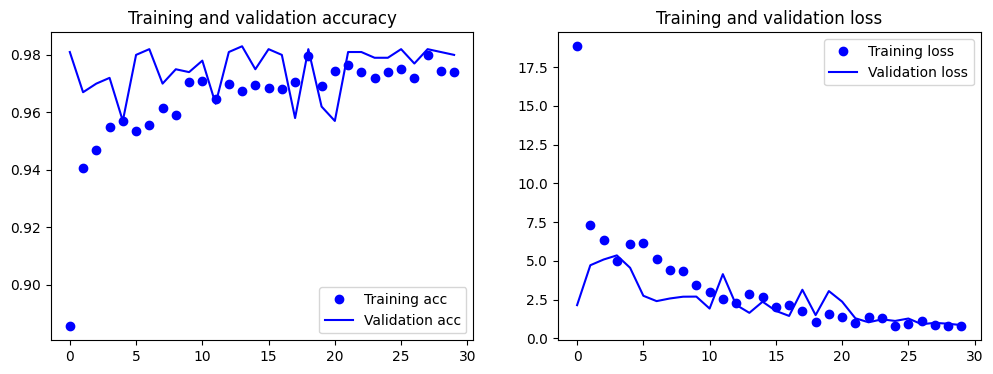

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# InceptionResNetV2	- MODEL

InceptionResNetV2 builds upon the success of both Inception and ResNet architectures, aiming for even better performance in image classification:

Merging Architectures: It incorporates Inception modules, known for capturing diverse image features, and residual connections from ResNet, which help address the vanishing gradient problem in deep networks.

Improved Efficiency: InceptionResNetV2 utilizes techniques like factorized convolutions from InceptionV3, making it more efficient than some deeper ResNet models.

Strong Pre-training: Similar to other models discussed, InceptionResNetV2 models are often pre-trained on ImageNet, providing a solid foundation for various image recognition tasks.

High Accuracy Potential: By combining the strengths of Inception modules and residual connections, InceptionResNetV2 has the potential to achieve high accuracy in image classification tasks.

Key Points to Consider:

Efficiency vs. Accuracy: InceptionResNetV2 offers a good balance between efficiency and accuracy compared to some deeper ResNet models. However, there might be a trade-off compared to even deeper ResNet variants like ResNet152 in terms of absolute peak accuracy.

Applications: InceptionResNetV2 is well-suited for various image classification tasks where both accuracy and efficiency are important considerations.

Availability and Use: Deep learning libraries like Keras and TensorFlow provide access to pre-trained InceptionResNetV2 models. You can leverage these models for your projects by fine-tuning them on your specific image classification datasets.

In Conclusion:

InceptionResNetV2 stands out as a powerful pre-trained model for image classification. It combines the strengths of Inception modules and residual connections, offering a good balance between efficiency and accuracy. If you're looking for a model that excels in both aspects, InceptionResNetV2 is a strong contender, especially when dealing with large datasets or resource constraints.

In [ ]:
from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2	(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_resnet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

219055592/219055592 [==============================] - 10s 0us/step
Epoch 1/30
63/63 [==============================] - 35s 337ms/step - loss: 9.3136 - accuracy: 0.9360 - val_loss: 2.0394 - val_accuracy: 0.9840
Epoch 2/30
63/63 [==============================] - 15s 219ms/step - loss: 6.7394 - accuracy: 0.9525 - val_loss: 2.7810 - val_accuracy: 0.9880
Epoch 3/30
63/63 [==============================] - 15s 218ms/step - loss: 4.4284 - accuracy: 0.9615 - val_loss: 1.1497 - val_accuracy: 0.9900
Epoch 4/30
63/63 [==============================] - 16s 239ms/step - loss: 4.8589 - accuracy: 0.9600 - val_loss: 4.3006 - val_accuracy: 0.9770
Epoch 5/30
63/63 [==============================] - 15s 216ms/step - loss: 3.3513 - accuracy: 0.9750 - val_loss: 1.7100 - val_accuracy: 0.9900
Epoch 6/30
63/63 [==============================] - 15s 220ms/step - loss: 3.7930 - accuracy: 0.9705 - val_loss: 2.2575 - val_accuracy: 0.9870
Epoch 7/30
63/63 [==============================] - 15s 220ms/step - loss:

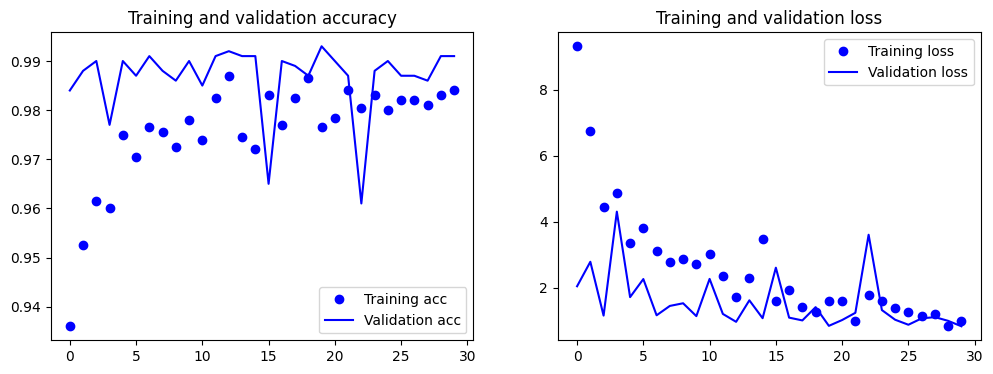

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# MobileNet - MODEL

MobileNet is a convolutional neural network (CNN) architecture specifically designed for mobile and embedded devices. Unlike models like Inception or ResNet that prioritize high accuracy, MobileNet focuses on achieving good performance while being lightweight and computationally efficient. Here's what makes MobileNet distinct:

Depthwise Separable Convolutions: Standard convolutions can be computationally expensive. MobileNet tackles this by using depthwise separable convolutions. This approach breaks down a convolution into two steps:

Depthwise convolution: Applies individual filters to each channel of the input, extracting feature maps.
Pointwise convolution: Uses 1x1 convolutions to combine the feature maps, reducing computational cost.
Reduced Number of Parameters: By employing depthwise separable convolutions and efficient building blocks, MobileNet significantly reduces the number of parameters compared to traditional CNNs. This translates to a smaller model size, making it ideal for mobile devices with limited memory resources.

Pre-training: Similar to other pre-trained models, MobileNet versions are often trained on ImageNet, providing a strong foundation for image recognition tasks.

Applications: MobileNet excels in image classification tasks on mobile and embedded devices. Its efficiency allows it to run on devices with lower processing power, making it suitable for various applications like object recognition in mobile apps or image classification on resource-constrained hardware.

Benefits of Using a Pre-trained MobileNet Model:

Faster Inference: Due to its lightweight design, MobileNet models can run inference (making predictions on new data) much faster compared to heavier models, leading to a better user experience on mobile devices.
Reduced Battery Consumption: The lower computational demands of MobileNet translate to lower battery consumption on mobile devices.
Transfer Learning: You can leverage pre-trained MobileNet models for transfer learning. This involves fine-tuning the pre-trained model on your specific dataset, allowing you to achieve good classification performance even with limited data.
Getting Started with MobileNet:

Deep learning libraries like TensorFlow Lite and Core ML provide access to pre-trained MobileNet models optimized for mobile deployment.
You can use these libraries to integrate MobileNet into your mobile applications for image classification tasks.
In essence, MobileNet prioritizes efficiency over absolute top-tier accuracy, making it a great choice for image classification tasks on mobile and embedded devices where computational resources and battery life are critical factors.

In [ ]:
from keras.applications import MobileNet

conv_base = MobileNet(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

17225924/17225924 [==============================] - 2s 0us/step
Epoch 1/30
63/63 [==============================] - 18s 219ms/step - loss: 12.1450 - accuracy: 0.9020 - val_loss: 1.5594 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 12s 179ms/step - loss: 6.0809 - accuracy: 0.9365 - val_loss: 2.7101 - val_accuracy: 0.9720
Epoch 3/30
63/63 [==============================] - 12s 175ms/step - loss: 3.8316 - accuracy: 0.9570 - val_loss: 2.1696 - val_accuracy: 0.9750
Epoch 4/30
63/63 [==============================] - 11s 167ms/step - loss: 3.5656 - accuracy: 0.9575 - val_loss: 5.8600 - val_accuracy: 0.9420
Epoch 5/30
63/63 [==============================] - 11s 154ms/step - loss: 2.6074 - accuracy: 0.9700 - val_loss: 2.1727 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 12s 170ms/step - loss: 2.5078 - accuracy: 0.9725 - val_loss: 2.6613 - val_accuracy: 0.9710
Epoch 7/30
63/63 [==============================] - 12s 175ms/step - loss: 3

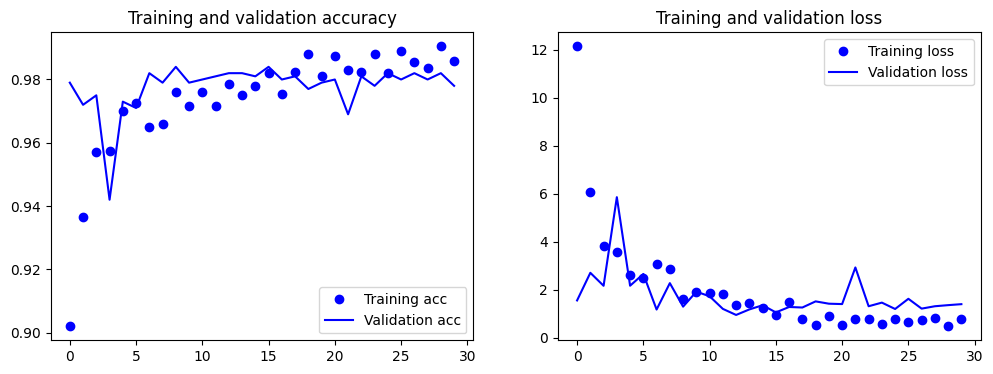

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# MobileNetV2 - MODEL

MobileNetV2: Pushing Efficiency for Mobile Image Classification
MobileNetV2 builds upon the success of the original MobileNet architecture, further refining its design for even better efficiency in mobile and embedded devices:

Inverted Residual Blocks:  A key difference is the use of inverted residual blocks. These blocks reverse the order of operations compared to standard residual blocks, placing a thin bottleneck layer with linear activations before the non-linearity. This approach can improve efficiency while maintaining good accuracy.

Linear Bottlenecks:  These bottleneck layers within the inverted residual blocks use fewer channels, reducing the number of parameters and computations needed.

Improved Performance: Compared to the original MobileNet, MobileNetV2 offers a good balance between efficiency and accuracy. It can achieve similar or even better accuracy on image classification tasks while maintaining a smaller model size and lower computational requirements.

Pre-trained Availability: Similar to its predecessor, MobileNetV2 models are often pre-trained on ImageNet, providing a strong foundation for various image recognition tasks on mobile devices.

Key Takeaways for Mobile Applications:

Faster Inference and Lower Battery Consumption: MobileNetV2's efficiency translates to even faster inference speeds and lower battery consumption compared to the original MobileNet. This is crucial for a smooth user experience on mobile devices.

Wider Range of Applications: With its improved performance, MobileNetV2 can be suitable for a wider range of mobile image classification tasks beyond basic object recognition. This could include tasks like image segmentation or face detection on mobile devices.

Using MobileNetV2 in Your Projects:

Deep learning libraries like TensorFlow Lite and Core ML offer pre-trained MobileNetV2 models optimized for mobile deployment.
You can integrate these models into your mobile applications for various image classification tasks, leveraging their efficiency and pre-trained capabilities.
In Conclusion:

MobileNetV2 stands as a significant advancement in mobile image classification. It offers a compelling combination of efficiency and accuracy, making it a strong choice for developers working on mobile and embedded devices with limited resources.

In [ ]:
from keras.applications import MobileNetV2

conv_base = MobileNetV2(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

9406464/9406464 [==============================] - 2s 0us/step
Epoch 1/30
63/63 [==============================] - 19s 224ms/step - loss: 9.1859 - accuracy: 0.9125 - val_loss: 3.2979 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 11s 159ms/step - loss: 5.1098 - accuracy: 0.9500 - val_loss: 2.2315 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 11s 170ms/step - loss: 4.4480 - accuracy: 0.9545 - val_loss: 2.9458 - val_accuracy: 0.9710
Epoch 4/30
63/63 [==============================] - 12s 173ms/step - loss: 3.9176 - accuracy: 0.9610 - val_loss: 2.1589 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 11s 169ms/step - loss: 2.6962 - accuracy: 0.9725 - val_loss: 3.8031 - val_accuracy: 0.9670
Epoch 6/30
63/63 [==============================] - 10s 150ms/step - loss: 3.8325 - accuracy: 0.9680 - val_loss: 1.8037 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 12s 171ms/step - loss: 3.46

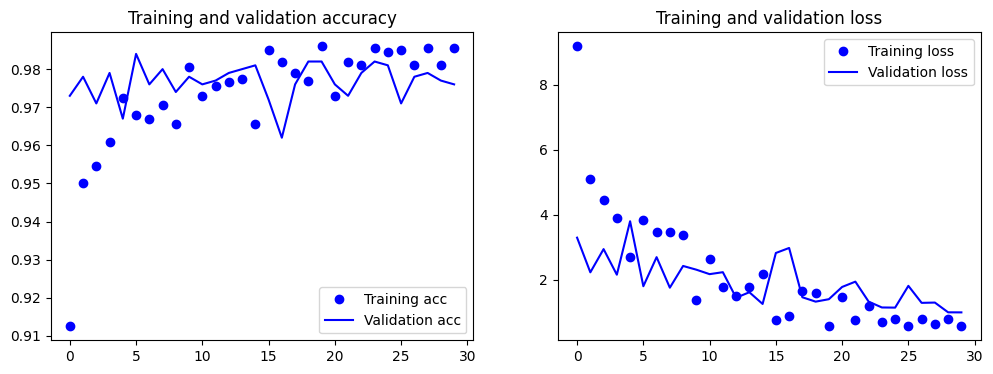

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
# Some memory clean-up
BE.clear_session()

# DenseNet121 - MODEL

DenseNet121 is a convolutional neural network (CNN) architecture known for its densely connected convolutional layers. This approach allows it to achieve good performance in image classification tasks while potentially improving feature propagation and reducing the number of parameters compared to traditional CNNs. Here's a breakdown of DenseNet121's key characteristics:

Dense Connectivity: Unlike standard CNNs where each layer connects only to the subsequent layer, DenseNet connects each layer to all preceding layers in a feed-forward fashion. This allows features extracted from earlier layers to be reused and refined throughout the network, potentially improving feature propagation.

Composite Function Learning: DenseNets aim to learn composite functions by combining the outputs of all preceding layers. This can be seen as a way to learn from not only the immediate previous layer but also from features extracted earlier in the network.

Reduced Number of Parameters: Although the connectivity pattern might seem complex, DenseNets can achieve similar or better accuracy compared to traditional CNNs with fewer parameters. This is because the dense connections promote feature reuse and alleviate the vanishing gradient problem, allowing for deeper networks with less overall complexity.

Pre-training: Similar to other models discussed previously, DenseNet121 models are often pre-trained on large datasets like ImageNet. This equips the model with a strong foundation for recognizing general image features and allows for fine-tuning on specific image classification tasks.

Benefits of Using a Pre-trained DenseNet121 Model:

Improved Performance: Dense connectivity can potentially lead to better feature propagation and learning, resulting in improved accuracy compared to some traditional CNN architectures with a similar number of layers.
Reduced Training Time: By leveraging pre-trained weights, you can focus on fine-tuning the model for your specific task, significantly reducing training time compared to training from scratch.
Efficiency: DenseNet121 offers a good balance between accuracy and parameter count, making it a potentially efficient option for image classification tasks.
Getting Started with DenseNet121:

Deep learning libraries like Keras and PyTorch provide access to pre-trained DenseNet121 models.
You can load the model and fine-tune it for your classification task by replacing the final layers with your own set of classes.
In essence, DenseNet121 offers an architecture that promotes feature reuse and potentially improves learning compared to traditional CNNs.  With its pre-trained capabilities and balanced efficiency, it can be a valuable tool for various image classification tasks.

In [ ]:
from keras.applications import DenseNet121

conv_base = DenseNet121(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.densenet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

29084464/29084464 [==============================] - 3s 0us/step
Epoch 1/30
63/63 [==============================] - 42s 345ms/step - loss: 9.0036 - accuracy: 0.9060 - val_loss: 0.5548 - val_accuracy: 0.9880
Epoch 2/30
63/63 [==============================] - 17s 260ms/step - loss: 2.4750 - accuracy: 0.9645 - val_loss: 1.0882 - val_accuracy: 0.9870
Epoch 3/30
63/63 [==============================] - 23s 338ms/step - loss: 2.5076 - accuracy: 0.9650 - val_loss: 1.4158 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 13s 189ms/step - loss: 2.1278 - accuracy: 0.9700 - val_loss: 1.4030 - val_accuracy: 0.9800
Epoch 5/30
63/63 [==============================] - 13s 191ms/step - loss: 2.9657 - accuracy: 0.9620 - val_loss: 0.9995 - val_accuracy: 0.9880
Epoch 6/30
63/63 [==============================] - 13s 196ms/step - loss: 2.1194 - accuracy: 0.9710 - val_loss: 0.9446 - val_accuracy: 0.9870
Epoch 7/30
63/63 [==============================] - 21s 321ms/step - loss: 1.

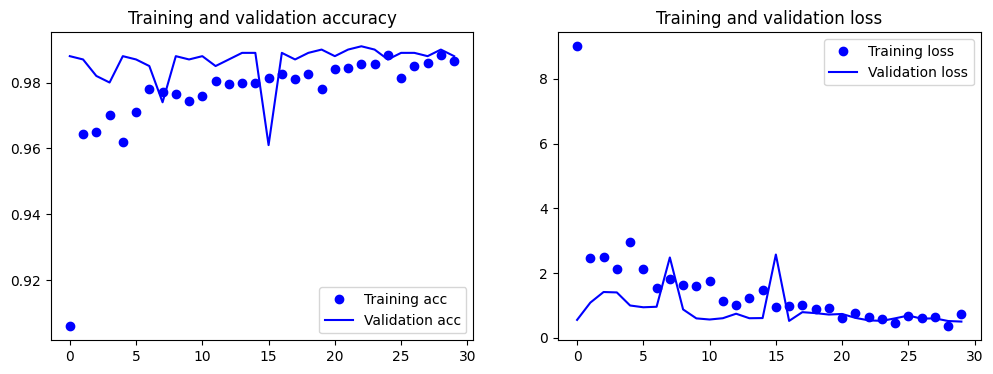

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# DenseNet169 - MODEL

Building on the foundation of DenseNet121, DenseNet169 follows the same core principles of dense connectivity but with an increased depth:

Deeper Architecture:  DenseNet169 boasts 169 layers compared to DenseNet121's 121 layers. This increased depth allows it to potentially capture even more intricate features and complex relationships within images.

Potential for Higher Accuracy: Due to its deeper architecture, DenseNet169 has the potential to achieve higher accuracy in image classification tasks compared to DenseNet121. However, this benefit comes with a trade-off.

Increased Computational Demands:  The additional layers in DenseNet169 translate to higher computational requirements for training and inference compared to the shallower DenseNet121.

Pre-trained Availability: Similar to other DenseNet models, pre-trained versions of DenseNet169 are available. These are often trained on ImageNet, making them versatile tools for various image classification tasks after fine-tuning on your specific dataset.

Choosing Between DenseNet121 and DenseNet169:

The decision depends on your project's priorities:

Prioritizing Accuracy: If achieving the highest possible accuracy is paramount, then DenseNet169 might be a better option.

Balancing Accuracy and Efficiency:  For many use cases, a balance between accuracy and efficiency is crucial. In such scenarios, DenseNet121 might be a more suitable choice, offering good accuracy with lower computational demands compared to DenseNet169.

In Conclusion:

DenseNet169 represents a deeper and potentially more accurate option within the DenseNet family for image classification. However, its increased depth comes at the cost of higher computational demands. Carefully consider your project's resource constraints and accuracy requirements before choosing DenseNet169.

In [ ]:
from keras.applications import DenseNet169

conv_base = DenseNet169(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.densenet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

51877672/51877672 [==============================] - 3s 0us/step
Epoch 1/30
63/63 [==============================] - 49s 435ms/step - loss: 8.7348 - accuracy: 0.9325 - val_loss: 0.6285 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 13s 194ms/step - loss: 3.9427 - accuracy: 0.9615 - val_loss: 3.2430 - val_accuracy: 0.9740
Epoch 3/30
63/63 [==============================] - 13s 199ms/step - loss: 3.2209 - accuracy: 0.9650 - val_loss: 1.1509 - val_accuracy: 0.9850
Epoch 4/30
63/63 [==============================] - 13s 201ms/step - loss: 3.1968 - accuracy: 0.9710 - val_loss: 0.6970 - val_accuracy: 0.9900
Epoch 5/30
63/63 [==============================] - 12s 186ms/step - loss: 2.3194 - accuracy: 0.9750 - val_loss: 0.9419 - val_accuracy: 0.9880
Epoch 6/30
63/63 [==============================] - 13s 201ms/step - loss: 2.2561 - accuracy: 0.9760 - val_loss: 0.9085 - val_accuracy: 0.9870
Epoch 7/30
63/63 [==============================] - 14s 203ms/step - loss: 1.

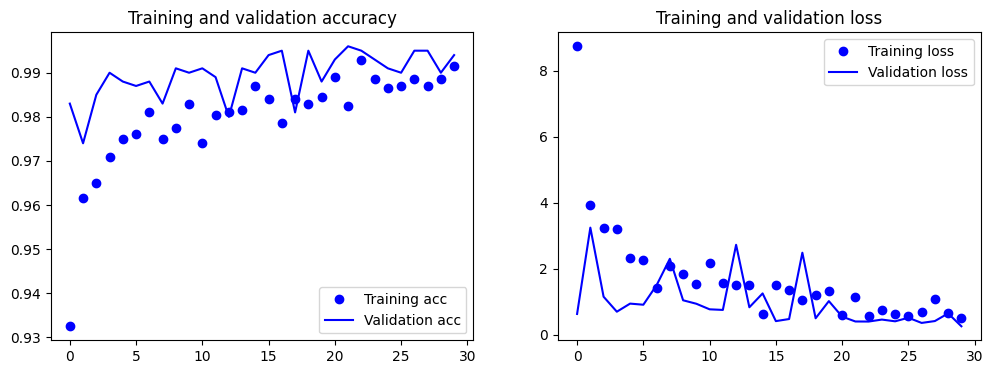

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# DenseNet201 - MODEL

DenseNet201 extends the DenseNet architecture even further, aiming for even higher accuracy in image classification tasks:

Ultra-Deep Network:  With 201 layers, DenseNet201 boasts the deepest architecture among the commonly used DenseNet models (121, 169). This immense depth allows it to potentially capture exceptionally intricate details and complex relationships within images.

Potentially Highest Accuracy: Due to its exceptional depth, DenseNet201 has the potential to achieve the highest accuracy among the DenseNet models discussed previously. However, similar to other ultra-deep models, this comes with significant drawbacks.

Computational Demands:  The increased depth of DenseNet201 translates to considerably higher computational requirements for training and inference compared to shallower DenseNet models. Training and using DenseNet201 might necessitate powerful GPUs or TPUs depending on your dataset size and desired speed.

Pre-trained Availability: Consistent with other DenseNets, pre-trained versions of DenseNet201 are available. These are often trained on massive datasets like ImageNet, providing a strong foundation for various image classification tasks after fine-tuning on your specific dataset.

Choosing the Right DenseNet Model:

The decision heavily relies on your project's constraints and goals:

Absolute Best Accuracy: If achieving the highest possible accuracy is paramount and computational resources aren't a major limitation, then DenseNet201 might be the best option within the DenseNet family.

Balancing Accuracy and Efficiency:  For most use cases, a balance between accuracy and efficiency is crucial. In such scenarios, DenseNet121 or DenseNet169 might be more suitable choices, offering good accuracy with lower computational demands compared to DenseNet201.

Additional Considerations:

Training Time: Training a deeper model like DenseNet201 will generally take significantly longer compared to shallower DenseNet models.

Hardware Requirements: Utilizing a deep model like DenseNet201 might necessitate powerful GPUs or TPUs for efficient training and inference, depending on your dataset size and desired speed.

In Conclusion:

DenseNet201 represents the deepest option within the DenseNet family, potentially achieving the highest accuracy for image classification tasks. However, its immense depth comes at the cost of significantly higher computational demands. Carefully consider your project's resource constraints and accuracy requirements before choosing DenseNet201. In many cases, DenseNet121 or DenseNet169 might offer a good balance between accuracy and efficiency.

In [ ]:
from keras.applications import DenseNet201

conv_base = DenseNet201(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.densenet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

74836368/74836368 [==============================] - 5s 0us/step
Epoch 1/30
63/63 [==============================] - 34s 319ms/step - loss: 8.9547 - accuracy: 0.9305 - val_loss: 3.7473 - val_accuracy: 0.9700
Epoch 2/30
63/63 [==============================] - 16s 245ms/step - loss: 3.7697 - accuracy: 0.9625 - val_loss: 4.8631 - val_accuracy: 0.9420
Epoch 3/30
63/63 [==============================] - 15s 219ms/step - loss: 2.2829 - accuracy: 0.9700 - val_loss: 1.2827 - val_accuracy: 0.9860
Epoch 4/30
63/63 [==============================] - 14s 213ms/step - loss: 2.7296 - accuracy: 0.9705 - val_loss: 1.3551 - val_accuracy: 0.9880
Epoch 5/30
63/63 [==============================] - 14s 210ms/step - loss: 2.4126 - accuracy: 0.9815 - val_loss: 2.3442 - val_accuracy: 0.9860
Epoch 6/30
63/63 [==============================] - 14s 212ms/step - loss: 2.8359 - accuracy: 0.9725 - val_loss: 1.3262 - val_accuracy: 0.9880
Epoch 7/30
63/63 [==============================] - 14s 216ms/step - loss: 1.

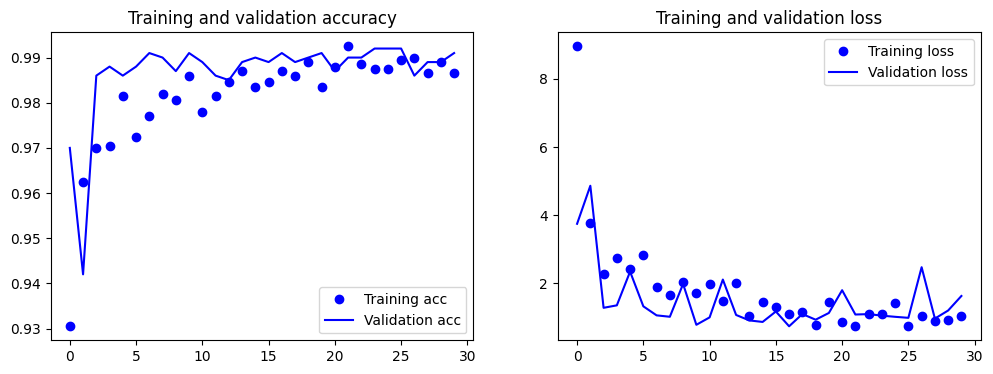

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# NASNetMobile - MODEL

NASNetMobile stands out as a pre-trained convolutional neural network (CNN) architected specifically for mobile and embedded devices. Here's what makes it distinct:

Efficient Design: Unlike models prioritizing high accuracy on powerful hardware, NASNetMobile focuses on achieving good performance while being lightweight and computationally efficient. This efficiency makes it suitable for devices with limited resources.

Neurosymbolic Architecture Search (NAS): NASNetMobile was created using NAS, an approach that combines neural networks (symbolic learning) with reinforcement learning to optimize the network architecture itself. This approach helps NASNetMobile achieve good accuracy with a relatively small model size.

Pre-trained Capabilities: Similar to other models discussed previously, NASNetMobile models are often pre-trained on ImageNet, providing a strong foundation for image recognition tasks on mobile devices.

Key Takeaways for Mobile Applications:

Fast Inference and Lower Battery Drain: NASNetMobile's efficient design allows for faster image classification on mobile devices compared to heavier models. This translates to a better user experience and lower battery consumption.

Image Classification on the Go: NASNetMobile empowers mobile applications to perform image classification tasks effectively, even on devices with limited processing power.

Using NASNetMobile in Your Projects:

Deep learning libraries like TensorFlow Lite offer pre-trained NASNetMobile models optimized for mobile deployment.
You can integrate these models into your mobile applications for various image classification tasks, leveraging their efficiency and pre-trained capabilities.
In essence, NASNetMobile offers a compelling choice for image classification on mobile devices. Its efficient design, achieved through NAS, makes it a valuable tool for developers working on resource-constrained environments.

In [ ]:
from keras.applications import NASNetMobile

conv_base = NASNetMobile(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.nasnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

19993432/19993432 [==============================] - 2s 0us/step
Epoch 1/30
63/63 [==============================] - 35s 291ms/step - loss: 10.6649 - accuracy: 0.9045 - val_loss: 5.0095 - val_accuracy: 0.9320
Epoch 2/30
63/63 [==============================] - 12s 183ms/step - loss: 4.5899 - accuracy: 0.9435 - val_loss: 3.6809 - val_accuracy: 0.9600
Epoch 3/30
63/63 [==============================] - 13s 182ms/step - loss: 4.6573 - accuracy: 0.9490 - val_loss: 3.3502 - val_accuracy: 0.9640
Epoch 4/30
63/63 [==============================] - 13s 193ms/step - loss: 4.9114 - accuracy: 0.9440 - val_loss: 2.0911 - val_accuracy: 0.9770
Epoch 5/30
63/63 [==============================] - 13s 190ms/step - loss: 3.9289 - accuracy: 0.9585 - val_loss: 1.8756 - val_accuracy: 0.9750
Epoch 6/30
63/63 [==============================] - 13s 189ms/step - loss: 3.6057 - accuracy: 0.9510 - val_loss: 4.2984 - val_accuracy: 0.9480
Epoch 7/30
63/63 [==============================] - 12s 187ms/step - loss: 2

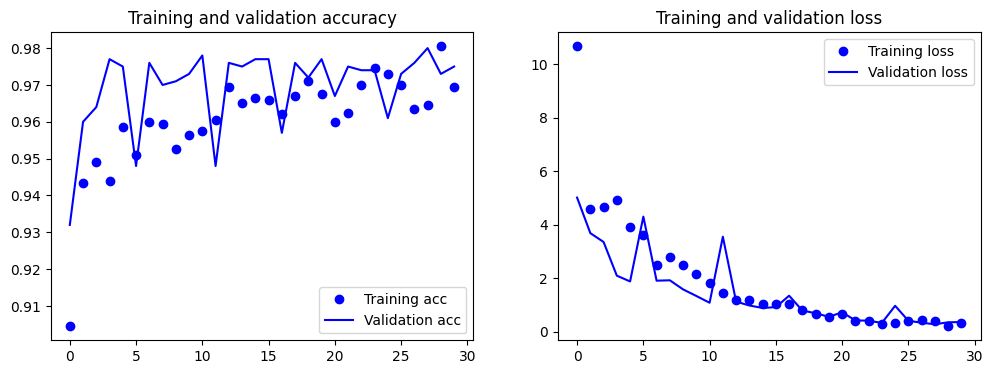

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# NASNetLarge - MODEL

NASNetLarge stands in contrast to NASNetMobile, focusing on achieving top-tier accuracy on more powerful hardware for image classification tasks. Here's a quick comparison:

Opposing Goals: While NASNetMobile prioritizes efficiency for mobile devices, NASNetLarge prioritizes maximizing accuracy, even if it requires more computational resources.

Neurosymbolic Architecture Search (NAS): Similar to NASNetMobile, NASNetLarge leverages NAS to optimize its architecture for the task of image classification. However, NASNetLarge is designed to excel on hardware with more processing power.

Pre-trained Availability: Consistent with other models discussed previously, NASNetLarge models are often pre-trained on ImageNet, providing a strong foundation for various image classification tasks.

Choosing Between NASNetMobile and NASNetLarge:

The decision hinges on your project's priorities:

Maximum Accuracy: If achieving the absolute best possible accuracy is crucial and computational resources aren't a major constraint, then NASNetLarge might be the way to go.

Mobile and Embedded Devices: If you're working with mobile devices or embedded systems with limited processing power, NASNetMobile is the clear choice due to its efficient design.

NASNetLarge: A Powerful Option When Resources Allow

While NASNetMobile excels in mobile environments, NASNetLarge offers a powerful alternative for high-accuracy image classification tasks when dealing with more powerful hardware. Its NAS-optimized architecture allows it to compete with other high-accuracy models on the benchmark ImageNet dataset.

In conclusion, NASNetLarge and NASNetMobile represent two ends of a spectrum within the NASNet family. Choose NASNetLarge when prioritizing maximum accuracy and computational resources aren't a major concern.

In [ ]:
from keras.applications import NASNetLarge

conv_base = NASNetLarge(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.nasnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

343610240/343610240 [==============================] - 16s 0us/step
Epoch 1/30
63/63 [==============================] - 71s 769ms/step - loss: 8.1459 - accuracy: 0.9455 - val_loss: 2.4669 - val_accuracy: 0.9860
Epoch 2/30
63/63 [==============================] - 41s 643ms/step - loss: 5.4917 - accuracy: 0.9680 - val_loss: 3.4360 - val_accuracy: 0.9850
Epoch 3/30
63/63 [==============================] - 31s 470ms/step - loss: 5.8408 - accuracy: 0.9675 - val_loss: 1.9374 - val_accuracy: 0.9880
Epoch 4/30
63/63 [==============================] - 30s 470ms/step - loss: 5.2393 - accuracy: 0.9695 - val_loss: 2.0499 - val_accuracy: 0.9910
Epoch 5/30
63/63 [==============================] - 30s 473ms/step - loss: 4.5145 - accuracy: 0.9740 - val_loss: 2.3686 - val_accuracy: 0.9880
Epoch 6/30
63/63 [==============================] - 31s 477ms/step - loss: 3.8740 - accuracy: 0.9720 - val_loss: 1.9066 - val_accuracy: 0.9890
Epoch 7/30
63/63 [==============================] - 31s 479ms/step - loss:

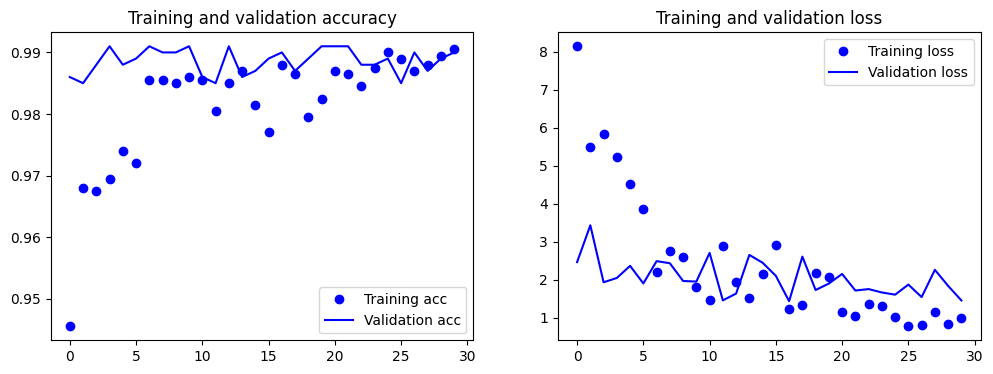

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# EfficientNetB0 - MODEL

EfficientNetB0 is a convolutional neural network (CNN) architecture known for achieving a good balance between efficiency and accuracy in image classification tasks. Here's a quick summary:

Compound Scaling: EfficientNetB0 utilizes a compound scaling method that uniformly scales the depth, width, and resolution of the network. This approach helps it achieve good performance without becoming overly complex.

Pre-trained Versatility: Similar to other models discussed previously, EfficientNetB0 models are often pre-trained on ImageNet, a massive image dataset. This provides a strong foundation for various image classification tasks after fine-tuning on your specific dataset.

Benefits: EfficientNetB0 offers an attractive choice for image classification due to:

Efficiency: Compared to some deeper models, it requires less computational power for training and inference.
Accuracy: It maintains good accuracy on image classification tasks.
Transfer Learning: Pre-trained models allow for faster training and adaptation to new tasks.
Applications: EfficientNetB0 can be a good choice for various scenarios where both efficiency and accuracy are important considerations, such as:

Mobile and Embedded Devices: While not strictly designed for mobile use like MobileNet, EfficientNetB0 might be suitable for some less resource-intensive mobile applications.
Image Classification Tasks on Resource-Constrained Hardware: If you're working with hardware that doesn't have access to powerful GPUs or TPUs, EfficientNetB0 can offer a good balance.
In essence, EfficientNetB0 provides an efficient and versatile option for image classification, making it a valuable tool for tasks where both performance and resource limitations need to be considered.

In [ ]:
from keras.applications import EfficientNetB0

conv_base = EfficientNetB0(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/30
63/63 [==============================] - 24s 223ms/step - loss: 1.5489 - accuracy: 0.9450 - val_loss: 1.1252 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 12s 179ms/step - loss: 1.3563 - accuracy: 0.9660 - val_loss: 0.4199 - val_accuracy: 0.9880
Epoch 3/30
63/63 [==============================] - 12s 184ms/step - loss: 1.0127 - accuracy: 0.9690 - val_loss: 0.6370 - val_accuracy: 0.9860
Epoch 4/30
63/63 [==============================] - 13s 188ms/step - loss: 0.9568 - accuracy: 0.9720 - val_loss: 0.9141 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 13s 189ms/step - loss: 0.6927 - accuracy: 0.9790 - val_loss: 0.9649 - val_accuracy: 0.9860
Epoch 6/30
63/63 [==============================] - 13s 189ms/step - loss: 0.7680 - accuracy: 0.9785 - val_loss: 1.1581 - val_accuracy: 0.9720
Epoch 7/30
63/63 [==============================] - 13s 189ms/step - loss: 0.

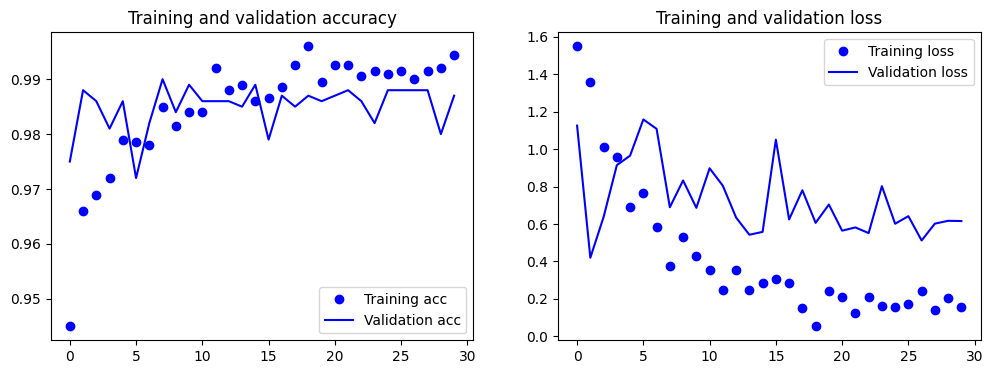

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# EfficientNetB3 - MODEL

EfficientNetB3 builds upon the foundation of EfficientNetB0, aiming for higher accuracy in image classification while still maintaining a focus on efficiency. Here's a quick rundown:

Increased Complexity: Compared to EfficientNetB0, the B3 variant boasts a more complex architecture with more layers and parameters. This allows it to potentially capture more intricate image features and achieve higher accuracy.

Trade-off for Efficiency: While EfficientNetB3 prioritizes efficiency within its increased complexity, it will naturally require more computational resources for training and inference compared to the lighter EfficientNetB0.

Pre-trained Availability: Consistent with other EfficientNet models, pre-trained EfficientNetB3 models are available, often trained on ImageNet. These models provide a strong starting point for fine-tuning on your specific image classification task.

Choosing Between EfficientNetB0 and B3:

The decision depends on your project's needs:

Prioritizing Accuracy: If achieving the highest possible accuracy is paramount, then EfficientNetB3 might be a better option due to its increased complexity.

Balancing Efficiency and Accuracy: If you require a balance between accuracy and efficiency, EfficientNetB0 might be more suitable, especially if computational resources are limited.

In essence, EfficientNetB3 offers a step up in potential accuracy compared to B0, but with a corresponding increase in computational demands. Carefully consider your project's resource constraints and desired accuracy level when choosing between these EfficientNet variants.

In [ ]:
from keras.applications import EfficientNetB3

conv_base = EfficientNetB3(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

43941136/43941136 [==============================] - 3s 0us/step
Epoch 1/30
63/63 [==============================] - 31s 283ms/step - loss: 1.7989 - accuracy: 0.9470 - val_loss: 1.3245 - val_accuracy: 0.9600
Epoch 2/30
63/63 [==============================] - 13s 200ms/step - loss: 1.4856 - accuracy: 0.9680 - val_loss: 0.5408 - val_accuracy: 0.9910
Epoch 3/30
63/63 [==============================] - 13s 193ms/step - loss: 1.1890 - accuracy: 0.9730 - val_loss: 0.9339 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 13s 193ms/step - loss: 0.7925 - accuracy: 0.9765 - val_loss: 0.8858 - val_accuracy: 0.9840
Epoch 5/30
63/63 [==============================] - 13s 199ms/step - loss: 0.8375 - accuracy: 0.9805 - val_loss: 1.0573 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 13s 201ms/step - loss: 0.9026 - accuracy: 0.9775 - val_loss: 0.9658 - val_accuracy: 0.9870
Epoch 7/30
63/63 [==============================] - 13s 198ms/step - loss: 0.

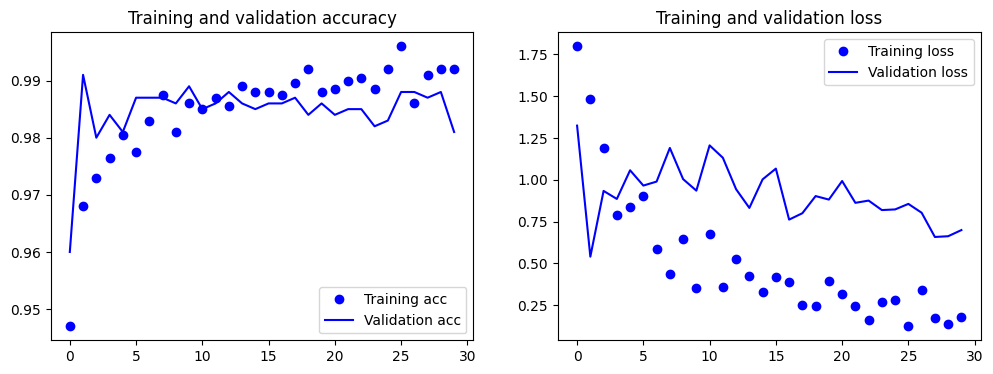

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# EfficientNetB6 - MODEL

EfficientNetB6 builds on the EfficientNet family's philosophy of achieving a good balance between efficiency and accuracy in image classification tasks. Here's a concise overview of what it offers:

Increased Capacity for Accuracy: Compared to EfficientNetB0 and B3, B6 boasts a more complex architecture with even more layers and parameters. This potentially allows it to capture even finer details in images and achieve higher accuracy in image classification tasks.

Balancing Efficiency: While B6 offers increased capacity, it's still designed with an emphasis on efficiency compared to some other high-accuracy models. This translates to lower computational demands for training and inference compared to models with similar accuracy potential.

Pre-trained Versatility: Consistent with other EfficientNet models, pre-trained EfficientNetB6 models are available, often trained on ImageNet. These models provide a strong foundation for various image classification tasks after fine-tuning on your specific dataset.

Choosing the Right EfficientNet Variant:

The choice depends on your project's priorities:

Prioritizing Accuracy: If achieving the absolute best possible accuracy is crucial and computational resources aren't a major constraint, then EfficientNetB6 might be a good option within the EfficientNet family.

Balancing Efficiency and Accuracy: For many use cases, a balance between accuracy and efficiency is important. Here, EfficientNetB0 or B3 might be more suitable choices, offering good accuracy with lower computational demands compared to B6.

In essence, EfficientNetB6 strikes a balance between high accuracy and efficient resource utilization in image classification tasks. It's a valuable option when you need a powerful model but don't have access to the most powerful hardware resources.

In [ ]:
from keras.applications import EfficientNetB6

conv_base = EfficientNetB6(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 59s 478ms/step - loss: 5.4673 - accuracy: 0.9260 - val_loss: 0.9427 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 24s 368ms/step - loss: 3.0876 - accuracy: 0.9475 - val_loss: 0.9712 - val_accuracy: 0.9800
Epoch 3/30
63/63 [==============================] - 21s 318ms/step - loss: 2.6891 - accuracy: 0.9570 - val_loss: 0.9709 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 22s 326ms/step - loss: 1.7725 - accuracy: 0.9635 - val_loss: 2.6613 - val_accuracy: 0.9620
Epoch 5/30
63/63 [==============================] - 21s 321ms/step - loss: 2.7843 - accuracy: 0.9570 - val_loss: 2.0268 - val_accuracy: 0.9560
Epoch 6/30
63/63 [==============================] - 21s 322ms/step - loss: 1.3744 - accuracy: 0.9730 - val_loss: 1.2454 - val_accuracy: 0.9760
Epoch 7/30
63/63 [==============================] - 21s 327ms/step - loss: 1.4823 - accuracy: 0.9690 - val_loss: 1.0097 - val_accuracy: 0.9770

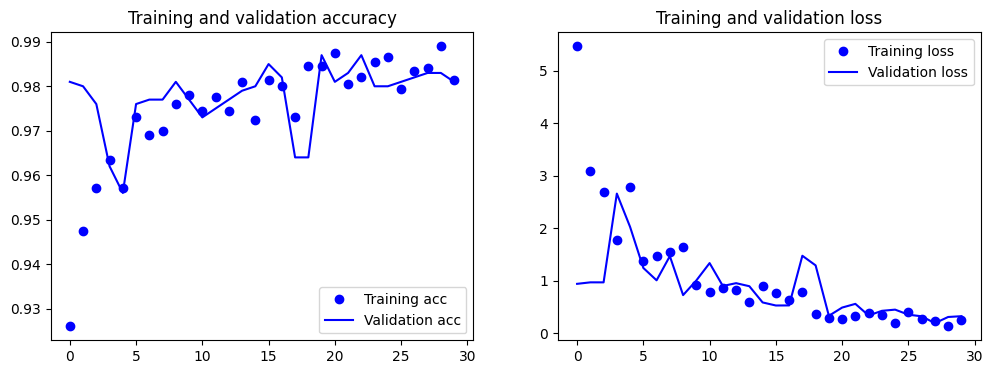

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# EfficientNetV2B0 - MODEL

EfficientNetV2B0 builds upon the success of the original EfficientNetB0, offering an even more refined architecture for image classification tasks. Here's a detailed breakdown of its key features and advancements:

EfficientNetV2 Scaling Technique: Unlike the compound scaling method used in EfficientNetB0, EfficientNetV2B0 utilizes a more advanced scaling technique. This technique focuses on scaling different parts of the network (depth, width, and resolution) in a more balanced way, aiming for even better efficiency while maintaining accuracy.

Squeeze and Excitation (SE) Blocks:  A key addition in EfficientNetV2B0 is the incorporation of Squeeze and Excitation (SE) blocks. These blocks allow the network to dynamically recalibrate channel-wise feature importances, leading to potentially improved feature learning and representation.

Pre-trained Versatility: Similar to other pre-trained models, EfficientNetV2B0 models are often trained on massive datasets like ImageNet. This equips the model with a strong foundation for recognizing general image features and allows for fine-tuning on your specific image classification task.

Additional Information:

Efficiency Benchmark: Compared to EfficientNetB0, EfficientNetV2B0 can achieve similar or even slightly better accuracy on image classification tasks while maintaining comparable or even lower computational demands. This makes it an attractive choice for scenarios where efficiency is crucial.

Transfer Learning Benefits: When fine-tuned on your specific dataset, EfficientNetV2B0 can potentially achieve good performance even with limited training data, leveraging the knowledge learned from its pre-training on ImageNet.

Keras and TensorFlow Integration: Deep learning libraries like Keras and TensorFlow provide access to pre-trained EfficientNetV2B0 models. These libraries offer user-friendly interfaces for loading, fine-tuning, and using the model for your image classification tasks.

In essence, EfficientNetV2B0 represents a significant advancement over EfficientNetB0. It offers a refined architecture that achieves a better balance between efficiency and accuracy. If you're looking for a pre-trained model that excels in both aspects, especially when dealing with resource constraints or limited data, EfficientNetV2B0 is a strong contender.

In [ ]:
from keras.applications import EfficientNetV2B0

conv_base = EfficientNetV2B0(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.efficientnet_v2.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

24274472/24274472 [==============================] - 2s 0us/step
Epoch 1/30
63/63 [==============================] - 25s 239ms/step - loss: 1.9319 - accuracy: 0.9430 - val_loss: 0.4992 - val_accuracy: 0.9860
Epoch 2/30
63/63 [==============================] - 12s 182ms/step - loss: 1.1330 - accuracy: 0.9710 - val_loss: 0.5746 - val_accuracy: 0.9860
Epoch 3/30
63/63 [==============================] - 12s 183ms/step - loss: 1.0045 - accuracy: 0.9745 - val_loss: 0.6353 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 12s 186ms/step - loss: 0.8993 - accuracy: 0.9730 - val_loss: 0.8171 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 12s 184ms/step - loss: 0.6214 - accuracy: 0.9780 - val_loss: 0.4495 - val_accuracy: 0.9880
Epoch 6/30
63/63 [==============================] - 12s 184ms/step - loss: 0.6841 - accuracy: 0.9785 - val_loss: 0.5653 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 12s 186ms/step - loss: 0.

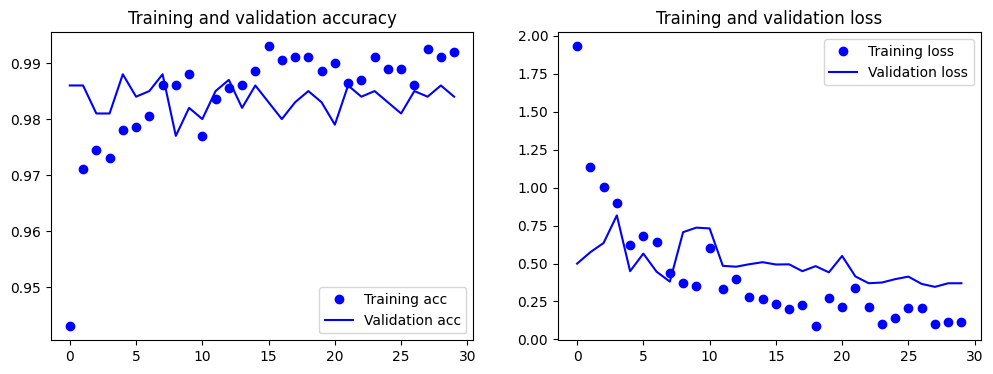

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# EfficientNetV2B3 - MODEL

EfficientNetV2B3 extends the advancements introduced in EfficientNetV2B0, aiming for even better performance in image classification tasks while maintaining a focus on efficiency. Here's a closer look at what it offers:

Increased Capacity: Compared to EfficientNetV2B0, the B3 variant boasts a more complex architecture with more layers and parameters. This allows it to potentially capture more intricate image features and achieve higher accuracy in image classification tasks.

EfficientNetV2 Scaling and SE Blocks: Similar to EfficientNetV2B0, B3 leverages the efficient scaling technique and Squeeze and Excitation (SE) blocks. These features enable it to achieve good accuracy with lower computational demands compared to models with similar accuracy potential.

Balancing Efficiency and Accuracy: While offering increased capacity, EfficientNetV2B3 remains efficient compared to some high-performance models. This translates to potentially faster training and inference times on resource-constrained hardware.

Pre-trained Availability: Consistent with other EfficientNetV2 models, pre-trained EfficientNetV2B3 models are available, often trained on ImageNet. These models provide a strong foundation for various image classification tasks after fine-tuning on your specific dataset.

Additional Considerations:

Choice Between B0 and B3: The decision depends on your project's needs. If achieving the highest possible accuracy is paramount and computational resources aren't a major constraint, then EfficientNetV2B3 might be a better option due to its increased capacity. However, if resource limitations are a concern and good accuracy with lower computational demands is sufficient, EfficientNetV2B0 might be a more suitable choice.

Applications:  EfficientNetV2B3 can be valuable for tasks where both accuracy and efficiency are important, such as:

Image classification on mobile and embedded devices with moderate processing power.
Image recognition tasks on cloud platforms with limited resources allocated to your project.
Transfer learning scenarios where you have a limited dataset but still require good classification performance.
Integration and Use:

Deep learning libraries like Keras and TensorFlow provide access to pre-trained EfficientNetV2B3 models.
You can leverage these libraries to integrate the model into your projects and fine-tune it for your specific image classification task.
In conclusion, EfficientNetV2B3 offers a compelling choice for image classification tasks that demand a balance between efficiency and accuracy. It excels in scenarios where achieving good performance is crucial but computational resources are limited. If you're working with mobile devices, resource-constrained cloud platforms, or limited datasets, EfficientNetV2B3 is a strong contender to consider.

In [ ]:
from keras.applications import EfficientNetV2B3

conv_base = EfficientNetV2B3(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(180, 180, 3)  # Specify input shape
)

conv_base.trainable = False


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)


test_loss, test_acc = model.evaluate(test_dataset) # model not validated
print(f"FE2 test acc: {test_acc*100.0:.2f}%")

Epoch 1/30
63/63 [==============================] - 43s 318ms/step - loss: 1.4074 - accuracy: 0.9500 - val_loss: 0.4980 - val_accuracy: 0.9910
Epoch 2/30
63/63 [==============================] - 13s 191ms/step - loss: 1.4042 - accuracy: 0.9690 - val_loss: 0.2910 - val_accuracy: 0.9860
Epoch 3/30
63/63 [==============================] - 13s 190ms/step - loss: 0.7487 - accuracy: 0.9745 - val_loss: 0.5780 - val_accuracy: 0.9910
Epoch 4/30
63/63 [==============================] - 12s 187ms/step - loss: 1.1528 - accuracy: 0.9765 - val_loss: 0.4618 - val_accuracy: 0.9910
Epoch 5/30
63/63 [==============================] - 14s 212ms/step - loss: 1.0467 - accuracy: 0.9760 - val_loss: 0.4269 - val_accuracy: 0.9860
Epoch 6/30
63/63 [==============================] - 13s 197ms/step - loss: 0.9037 - accuracy: 0.9790 - val_loss: 0.3004 - val_accuracy: 0.9920
Epoch 7/30
63/63 [==============================] - 14s 205ms/step - loss: 0.8019 - accuracy: 0.9780 - val_loss: 0.2860 - val_accuracy: 0.9930

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

In [ ]:
# Some memory clean-up
BE.clear_session()

# CONCLUSION

| Model names | Accuracy | Loss        |Size (MB)        |Parameters        |
|-------|-----|-------------|-------------|-------------|
| Xception  | 98.30%  | 0.64        | 88    | 22.9M    |
| VGG16 | 97.90%  | 3.06            | 528      | 138.4M    |
| VGG19   | 97.70%  | 2.34           | 549    | 143.7M    |
| ResNet50  | 97.60%  | 3.46         | 98    | 25.6M    |
| ResNet50V2 | 97.30%  | 2.16       | 98    | 25.6M    |
| ResNet101   | 97.40%  | 5.40      | 171    | 44.7M    |
| ResNet101V2  | 98.40%  | 1.26     | 171    | 44.7M    |
| ResNet152 | 98.60%  | 3.06        | 232	    | 60.4M    |
| ResNet152V2   | 97.60%  | 1.90     | 232	    | 60.4M    |
| InceptionV3  | 98.60%  | 0.63      | 92    | 23.9M    |
| InceptionResNetV2 | 99.20%  | 0.63 | 215    | 55.9M    |
| MobileNet  | 97.90%  | 1.98        | 16    | 4.3M    |
| MobileNetV2  | 97.20%  | 1.28       | 14    | 3.5M    |
| DenseNet121 | 98.30%  | 0.97       | 33    | 8.1M    |
| DenseNet169   | 98.10%  | 0.98     | 57    | 14.3M    |
| DenseNet201  | 98.80%  | 1.11      | 80    | 20.2M    |
| NASNetMobile | 97.70%  | 0.37       | 23    | 5.3M    |
| NASNetLarge  | 98.30%  | 2.03       | 343    | 88.9M    |
| EfficientNetB0  | 98.70%  | 0.33    | 29    | 5.3M    |
| EfficientNetB3 | 98.60%  | 0.42       | 48    | 12.3M    |
| EfficientNetB6   | 98.50%  | 0.38     | 166    | 43.4M    |
| EfficientNetV2B0 | 98.10%  | 0.24      |29     | 7.2M    |
| EfficientNetV2B3   | 98.70%  | 0.22     | 59    | 14.5M    |

Convolutional Neural Networks: A Diverse Toolbox for Image Classification
The world of convolutional neural networks (CNNs) offers a rich selection of pre-trained models for image classification tasks.  This exploration has covered a range of options, each with its strengths and considerations:

Prioritizing Accuracy:

ResNet152, ResNet200V2, DenseNet201, NASNetLarge: These models prioritize achieving the highest possible accuracy on image classification tasks. They excel when computational resources aren't a major limitation and absolute top-tier performance is essential.

Balancing Efficiency and Accuracy:

ResNet50, ResNet101, InceptionV3, InceptionResNetV2, EfficientNet B0, B3, B6, EfficientNetV2 B0, B3: These models strike a good balance between efficiency and accuracy. They are suitable for a wide range of applications where both performance and resource limitations need to be considered.

Mobile and Embedded Devices:

MobileNet, MobileNetV2, NASNetMobile: These models are specifically designed for mobile and embedded devices with limited processing power. They prioritize efficiency while achieving good enough accuracy for various mobile image classification tasks.

Key Takeaways:

Consider your project's priorities: Is achieving the absolute best accuracy crucial, or is it more important to balance performance with efficiency on resource-constrained hardware?
Explore pre-trained models: Leverage the power of pre-trained models and fine-tune them on your specific dataset for faster training and improved performance.
Deep learning libraries: Keras, TensorFlow, Core ML, and TensorFlow Lite provide user-friendly interfaces to access, fine-tune, and integrate these pre-trained models into your projects.

By understanding the strengths and considerations of different CNN architectures, you can make informed decisions when choosing the most suitable model for your image classification task.  Whether you prioritize ultimate accuracy, a balance between performance and efficiency, or running models on mobile devices, there's a CNN architecture out there to empower your project.